In [2]:
#Importaciones
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
#conectar google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#traer documento
filename = '/content/drive/My Drive/Boston_Housing_from_Sklearn.csv'
df = pd.read_csv(filename)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [6]:
df

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2
...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,69.1,21.0,9.67,22.4
502,0.04527,0.573,6.120,76.7,21.0,9.08,20.6
503,0.06076,0.573,6.976,91.0,21.0,5.64,23.9
504,0.10959,0.573,6.794,89.3,21.0,6.48,22.0


In [8]:
print('Hay', df.duplicated().sum(), 'duplicados.')
print('Hay', df.isna().sum().sum(), ' datos que faltan')


Hay 0 duplicados.
Hay 0  datos que faltan


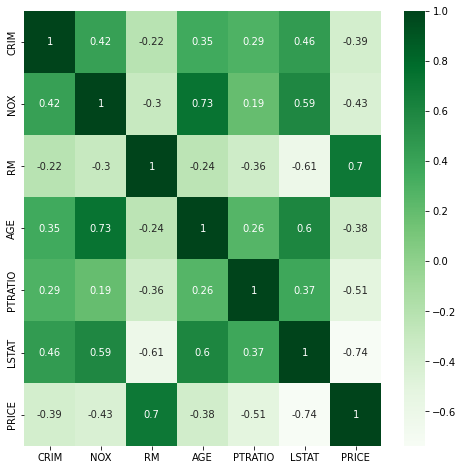

In [ ]:
#1) Realicen un mapa de calor de las correlaciones.  Identifiquen cualquier característica que tenga un coeficiente de correlación de magnitud 0,5 (puede ser + o -) o mayor con el precio.

corr = df.corr()
plt.figure(figsize = (8, 8))
sns.heatmap(corr, cmap = 'Greens', annot = True)

Identifiquen cualquier característica que tenga un coeficiente de correlación de magnitud 0,5 (puede ser + o -) o mayor con el precio.

-RM, PTRATIO, LSTAT

In [ ]:
#Limitaremos nuestros análisis de estas tres características.

X = df[['RM', 'PTRATIO', 'LSTAT']]
y = df['PRICE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
#Instancien el modelo y ajústenlo al conjunto de entrenamiento.
scaler = StandardScaler()
# Instanciar la regresión
lin_reg = LinearRegression()
# Crear el pipeline
reg_pipe = make_pipeline(scaler, lin_reg)
# Hacer el fit que corresponda
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluar el modelo de rendimiento en el conjunto de entrenamiento
train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

# usando la puntuación R^2. 
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Evalúen el modelo usando el error absoluto medio (EAM).
X_train_MAE = mean_absolute_error(y_train, train_pred)
X_test_MAE = mean_absolute_error(y_test, test_pred)

# 7) Evalúen el modelo usando el error cuadrático medio (ECM).  
X_train_MSE = mean_squared_error(y_train, train_pred)
X_test_MSE = mean_squared_error(y_test, test_pred)

In [ ]:
print('El Coeficiente de determinación R2 en el training es ', round(train_r2, 2))
print('El Coeficiente de determinación R2 en el testing es', round(test_r2, 2))
print('El Error Absoluto Medio (MAE) en el training es', round(X_train_MAE, 2))
print('El Error Absoluto Medio (MAE) en el test set es', round(X_test_MAE, 2))
print('El Error Cuadrático Medio (MSE) en el training es', round(X_train_MSE, 2))
print('El Error Cuadrático Medio (MSE) en el testing es', round(X_test_MSE, 2))
print('La Raíz del Error Cuadrático Medio (RMSE) en el training es', round(np.sqrt(X_train_MSE), 2))
print('La Raíz del Error Cuadrático Medio (RMSE) en el testing es', round(np.sqrt(X_test_MSE), 2))

El Coeficiente de determinación R2 en el training es  0.69
El Coeficiente de determinación R2 en el testing es 0.63
El Error Absoluto Medio (MAE) en el training es 3.71
El Error Absoluto Medio (MAE) en el test set es 3.39
El Error Cuadrático Medio (MSE) en el training es 27.69
El Error Cuadrático Medio (MSE) en el testing es 25.69
La Raíz del Error Cuadrático Medio (RMSE) en el training es 5.26
La Raíz del Error Cuadrático Medio (RMSE) en el testing es 5.07


Los resultados nos dicen lo contrario de los estipulado en clase. Lo que debe estar cerca del cero se aleja y lo que debe estar lejos se acerca.

El R2 nos dice que en el test solamente hay una variación que ronda el 63%.
Lo que refleja el Coeficiente de determinación es que hay una franja grande de error  a la hora de calcular el precio de una casa en Boston.

El Error Cuadrático Medio (MSE) es tan grande que supera al Error Absoluto Medio (MAE) lo que sugiere que el error es enorme y no permite de ninguna manera una predicción, ni mucho menos una generalicación.


In [9]:
y = df['PRICE']
X = df.drop(columns = 'PRICE')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [10]:
#Buscar el max depth en el modelo de arbol.
depths = list(range(1,100))
scores_dec = pd.DataFrame(index = depths, columns = ['Test_r2', 'Test_MAE', 'Test_MSE'])
for depth in depths:
  dec_tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
  dec_tree.fit(X_train, y_train)
  dec_pred = dec_tree.predict(X_test)
  scores_dec.loc[depth, 'Test_r2'] = dec_tree.score(X_test, y_test)
  scores_dec.loc[depth, 'Test_MAE'] = mean_absolute_error(y_test, dec_pred)
  scores_dec.loc[depth, 'Test_MSE'] = mean_squared_error(y_test, dec_pred)

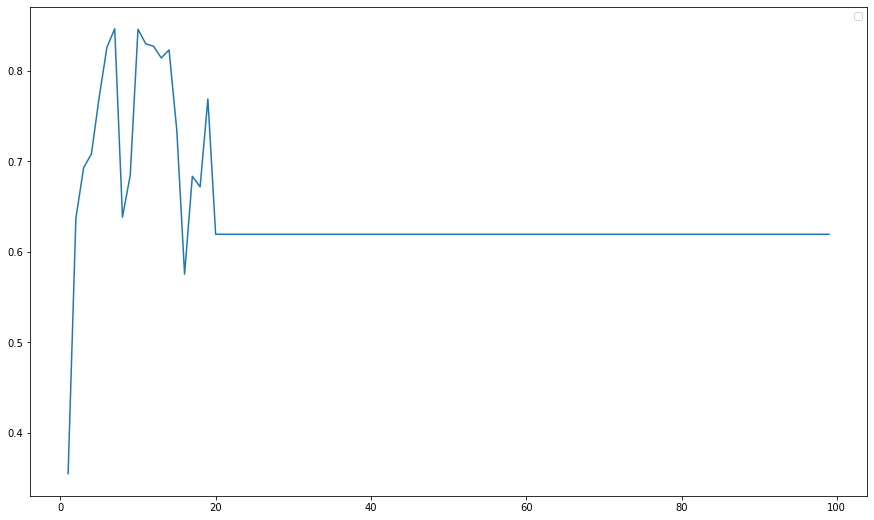

In [17]:
# Dibujar el R2
plt.figure(figsize = (15, 9))
plt.plot(depths, scores_dec['Test_r2'])
plt.legend()

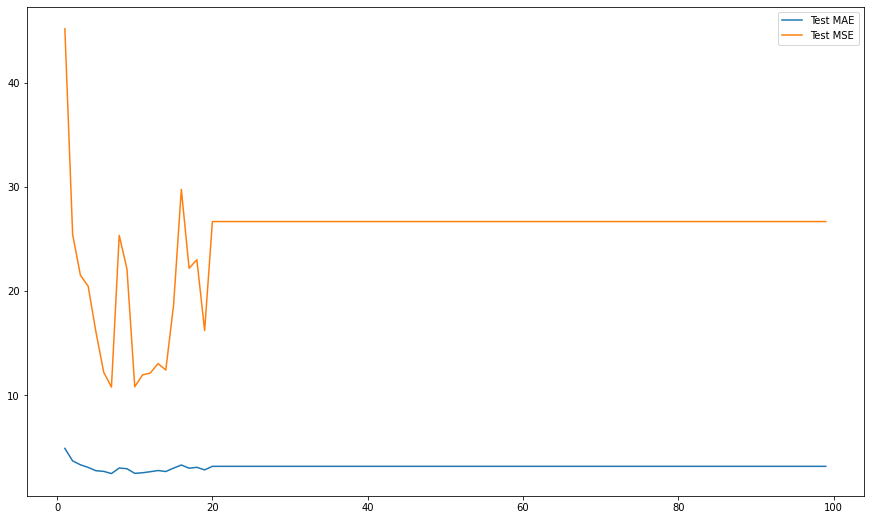

In [18]:
plt.figure(figsize = (15, 9))
plt.plot(depths, scores_dec['Test_MAE'], label = 'Test MAE')
plt.plot(depths, scores_dec['Test_MSE'], label = 'Test MSE')
plt.legend()

In [21]:
## Buscar el maximum depth en el árbol
scores_dec.iloc[15:25]

,Test_r2,Test_MAE,Test_MSE
16,0.57521,3.270604,29.746846
17,0.68343,2.96168,22.16848
18,0.671661,3.048031,22.992677
19,0.768847,2.801181,16.186988
20,0.619323,3.140945,26.657717
21,0.619323,3.140945,26.657717
22,0.619323,3.140945,26.657717
23,0.619323,3.140945,26.657717
24,0.619323,3.140945,26.657717
25,0.619323,3.140945,26.657717


De acuerdo con lo anterior debe ser la 19. Esto permite elegir un r2 de 0.77. lo que significa que contamos en el modelo con un 77% de variacion. El MAE es de 2800, lo que es bajo en comparación.

In [28]:
estimators = list(range(5, 155, 5))
scores_bag = pd.DataFrame(index = estimators, columns = ['Test R2', 'Test MAE', 'Test MSE'])
for est in estimators:
  bag_tree = BaggingRegressor(n_estimators = est, random_state = 42)
  bag_tree.fit(X_train, y_train)
  bag_pred = bag_tree.predict(X_test)
  scores_bag.loc[est, 'Test R2'] = bag_tree.score(X_test, y_test)
  scores_bag.loc[est, 'Test MAE'] = mean_absolute_error(y_test, bag_pred)
  scores_bag.loc[est, 'Test MSE'] = mean_squared_error(y_test, bag_pred)

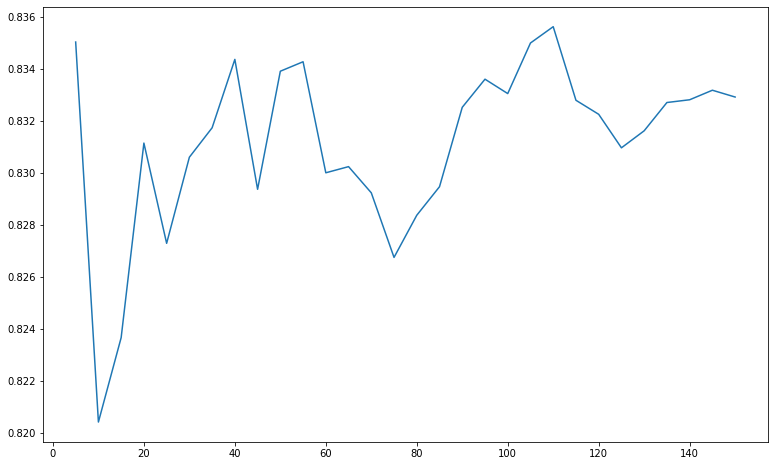

In [29]:
#graficar r2

plt.figure(figsize = (13, 8))
plt.plot(estimators, scores_bag['Test R2'])

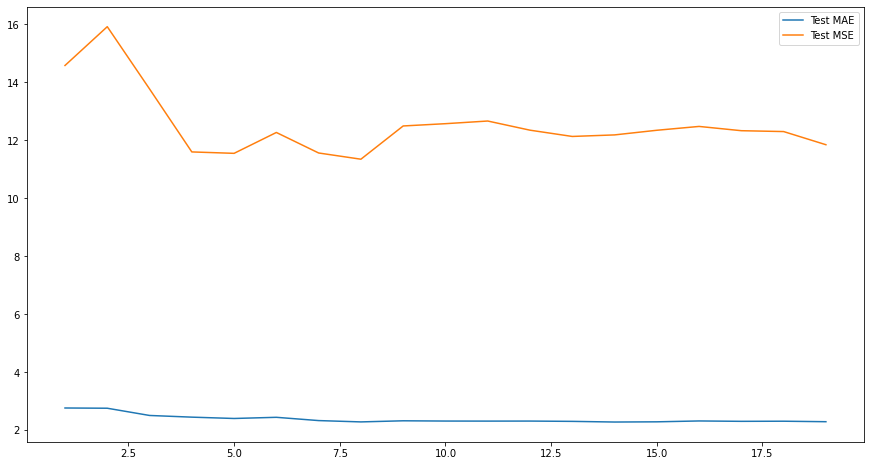

In [27]:
# Graficar errores
plt.figure(figsize = (15, 8))
plt.plot(estimators, scores_bag['Test MAE'], label = 'Test MAE')
plt.plot(estimators, scores_bag['Test MSE'], label = 'Test MSE')
plt.legend()

In [31]:
# Ordenar errores
scores_bag = scores_bag.sort_values(by = 'Test R2', ascending = False)
scores_bag.head()

,Test R2,Test MAE,Test MSE
110,0.835623,2.1866,11.510862
5,0.835033,2.404409,11.552157
105,0.834995,2.194391,11.554818
40,0.834365,2.229783,11.598921
55,0.834274,2.215634,11.605293


El parametro para estimators sera 110.  esto nos da un resultado de 0.84. Por lo que se ha mejroado el arbol de decision. Esto nos da un 84%de vaicion en los datos. Tambien mejoramos el error y predecimos un error de $2186.

In [32]:
#Construccion del Bosque aleatorio de ajuste del modelo
depths = list(range(1,50))
scores_rf = pd.DataFrame(index = depths, columns = ['Test R2', 'Test MAE', 'Test MSE'])
for depth in depths:
  rf = RandomForestRegressor(max_depth = depth, random_state = 42)
  rf.fit(X_train, y_train)
  rf_pred = rf.predict(X_test)
  scores_rf.loc[depth, 'Test R2'] = rf.score(X_test, y_test)
  scores_rf.loc[depth, 'Test MAE'] = mean_absolute_error(y_test, rf_pred)
  scores_rf.loc[depth, 'Test MSE'] = mean_squared_error(y_test, rf_pred)

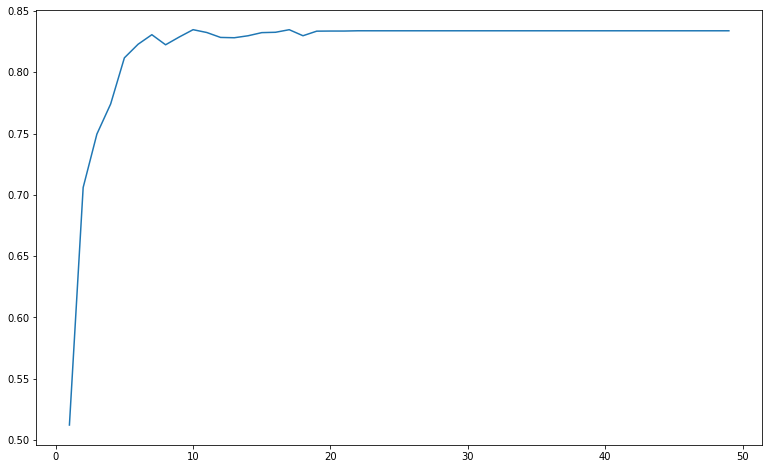

In [33]:
# Graficar R2
plt.figure(figsize = (13, 8))
plt.plot(scores_rf['Test R2'])

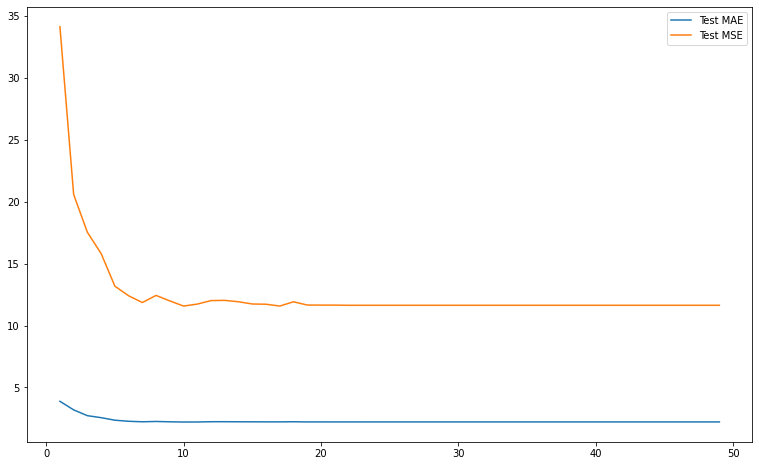

In [34]:
# Graficar errores
plt.figure(figsize = (13, 8))
plt.plot(scores_rf['Test MAE'], label = 'Test MAE')
plt.plot(scores_rf['Test MSE'], label = 'Test MSE')
plt.legend()

In [35]:
# Organizar los resultados
scores_rf = scores_rf.sort_values(by = 'Test R2', ascending = False)
scores_rf.head()

,Test R2,Test MAE,Test MSE
10,0.834747,2.198828,11.572214
17,0.834732,2.212516,11.573256
22,0.83386,2.208307,11.634292
25,0.833853,2.207858,11.634795
37,0.833853,2.207858,11.634795


POdemos comprobar que el rendimiento del max depth del bosque es igual al de los bagged trees. Por lo tanto, se elegirá el 10 como maxima profundidad. Lo que hace que el modelo tenga 84% de precisión, algo como $2200.

In [36]:
# Construcción del modelo
model = RandomForestRegressor(max_depth = 10, random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)